# Centrality and the Spread of Ideas Through a Network

## Objective

The goal of this project is to find the role of different metrics for centrality, such as degree centrality, eigenvector centrality, and betweenness centrality in the spread of ideas or diseases in the network. This project will also investigate the role of centrality in stopping the spread of disease by vaccination. 

## Approach

I will be using dataset from the official Twitter accounts of members of Congress in the fall of 2016 to investigate the patterns of connections on Twitter among Members of Congress (MOC). The idea is to use this network pattern to measure the importace of centrality in spreading ideas or disease through a network. Our findings can be used for both the spread of ideas and diseases because both share a similarity on how it spread called SIR epidemic model. 

I have made some simplification to do our analysis effectively:
* On Twitter, following is a *directed relation*. So person A can follow person B without person B necessarily following person A. Here, we've taken these directed relationships and turned them into an undirected network.
* Almost every Senator and Representative is in this dataset, but a few are missing; we'll ignore these missing people here.

I will divide this project into two parts. The first part will be an exploratory of the data to find the right approach to reach the main goal of this project. The second part is the main part where I will compare the metrics of centrality and give the conclusion to my findings. 

## Part I : Exploratory analysis of the dataset

The nodes in the `official_congress_twitter` network have attributes. These attributes include:

* `official_full` - the MOC's full name
* `gender` - the MOC's gender
* `party` - the MOC's political party
* `state` - the MOC's state
* `type` - either `sen` for Senator or `rep` for Representative

In [2]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pandas as pd

plt.style.use('fivethirtyeight')

import networkx as nx
import pickle

%matplotlib inline

np.random.seed(99)

In [3]:
try:
    official_congress_twitter = pickle.load(open('../data/congress-twitter/us_congress_2016_twitter_nx2.pickle', 'rb'))
except:
    official_congress_twitter = pickle.load(open('./us_congress_2016_twitter_nx2.pickle', 'rb'))
    pass

In [4]:
def nodes_to_table(g):
    """
    Given a network `g`, return a Table that has all of the attributes of the
    nodes in the network
    """
    
    df = {}
    df['node_id'] = list(g.nodes())
    
    # assume all nodes have the same attributes
    #att_names = g.node[df['node_id'][0]].keys()
    att_names = g.nodes[df['node_id'][0]].keys()
    
    for att in att_names:
        df[att] = [node[1][att] for node in g.nodes(data=True)]
    
    df = pd.DataFrame(df)
    
    return Table.from_df(df)

In [5]:
moc_data1 = nodes_to_table(official_congress_twitter)

moc_data1

node_id,state,nickname,url,last,religion,district,party,class,birthday,official_full,phone,bioguide,start,caucus,contact_form,twitter,suffix,type,state_rank,rss_url,address,office,end,fax,gender,first,middle
2974648323,CA,nan,https://knight.house.gov,Knight,nan,25,Republican,nan,1966-12-17,Stephen Knight,202-225-1956,K000387,2015-01-06,nan,nan,2.97465e+09,nan,rep,nan,nan,1023 Longworth HOB; Washington DC 20515-0525,1023 Longworth House Office Building,2017-01-03,202-226-0683,M,Steve,nan
2253968388,AL,nan,https://byrne.house.gov,Byrne,nan,1,Republican,nan,1955-02-16,Bradley Byrne,202-225-4931,B001289,2015-01-06,nan,https://byrne.house.gov/contact/email-me,2.25397e+09,nan,rep,nan,nan,119 Cannon HOB; Washington DC 20515-0101,119 Cannon House Office Building,2017-01-03,202-225-0562,M,Bradley,nan
236511574,MI,nan,http://www.peters.senate.gov,Peters,nan,nan,Democrat,2,1958-12-01,Gary C. Peters,202-224-6221,P000595,2015-01-06,nan,nan,2.36512e+08,nan,sen,junior,nan,724 Hart Senate Office Building Washington DC 20510,724 Hart Senate Office Building,2021-01-03,nan,M,Gary,C.
161411080,CA,nan,http://napolitano.house.gov,Napolitano,Roman Catholic,32,Democrat,nan,1936-12-04,Grace F. Napolitano,202-225-5256,N000179,2015-01-06,nan,https://napolitano.house.gov/contact-me/email-me,1.61411e+08,nan,rep,nan,http://napolitano.house.gov/rss.xml,1610 Longworth HOB; Washington DC 20515-0532,1610 Longworth House Office Building,2017-01-03,202-225-0027,F,Grace,F.
402719755,NV,nan,http://amodei.house.gov,Amodei,nan,2,Republican,nan,1958-06-12,Mark E. Amodei,202-225-6155,A000369,2015-01-06,nan,https://amodei.house.gov/contact-us,4.0272e+08,nan,rep,nan,http://amodei.house.gov/common/rss//?rss=49,332 Cannon HOB; Washington DC 20515-2802,332 Cannon House Office Building,2017-01-03,202-225-5679,M,Mark,E.
442824717,MA,nan,http://neal.house.gov,Neal,Roman Catholic,1,Democrat,nan,1949-02-14,Richard E. Neal,202-225-5601,N000015,2015-01-06,nan,https://forms.house.gov/neal/webforms/Contact_Form.shtml,4.42825e+08,nan,rep,nan,http://neal.house.gov/index.php?format=feed&type=rss,341 Cannon HOB; Washington DC 20515-2101,341 Cannon House Office Building,2017-01-03,202-225-8112,M,Richard,E.
267854863,LA,nan,http://richmond.house.gov,Richmond,nan,2,Democrat,nan,1973-09-13,Cedric L. Richmond,202-225-6636,R000588,2015-01-06,nan,https://richmond.house.gov/contact-me/email-me,2.67855e+08,nan,rep,nan,http://richmond.house.gov/rss.xml,240 Cannon HOB; Washington DC 20515-1802,240 Cannon House Office Building,2017-01-03,202- 225-1988,M,Cedric,L.
21157904,NC,nan,http://www.burr.senate.gov,Burr,Methodist,nan,Republican,3,1955-11-30,Richard Burr,202-224-3154,B001135,2011-01-05,nan,http://www.burr.senate.gov/public/index.cfm?FuseAction=C ...,2.11579e+07,nan,sen,senior,http://www.burr.senate.gov/public/index.cfm?fuseaction=r ...,217 Russell Senate Office Building Washington DC 20510,217 Russell Senate Office Building,2017-01-03,202-228-2981,M,Richard,M.
163570705,MO,nan,http://cleaver.house.gov,Cleaver,nan,5,Democrat,nan,1944-10-26,Emanuel Cleaver,202-225-4535,C001061,2015-01-06,nan,https://cleaver.house.gov/contact/email-me,1.63571e+08,II,rep,nan,http://cleaver.house.gov/rss.xml,2335 Rayburn HOB; Washington DC 20515-2505,2335 Rayburn House Office Building,2017-01-03,202-225-4403,M,Emanuel,nan
2962994194,NJ,nan,https://macarthur.house.gov,MacArthur,nan,3,Republican,nan,1960-10-16,Thomas MacArthur,202-225-4765,M001193,2015-01-06,nan,nan,2.96299e+09,nan,rep,nan,nan,506 Cannon HOB; Washington DC 20515-3003,506 Cannon House Office Building,2017-01-03,202-225-0778,M,Tom,nan


### Adding Degree, Betweeness Centrality, and Eigenvector Centrality to the Table

* Degree Centrality: Node's degree is how many connections a node has. A node is more central if it has a higher connection.
* Betweenness Centrality: The node is more central if it is on the shortest path between many other pairs of nodes (hence, the nodes are in the "between")
* Eigenvector Centrality: Similar to degree centrality, a node is more central if it has a higher connection. However, in eigenvector centrality, we also take into account the centrality of the neighbors instead of treating them equally. In other words, a node benefits from being connected to important nodes (nodes with high centrality). 

There is a mathematical calculation for these centralities, however, I will use a function from networkx to quantify these variables. A higher number indicates the higher centrality of a node. 

In [6]:
moc_node_centrality_dat = Table().with_columns(
    'node_id', moc_data1[0] ,
    'betweenness_centrality', nx.betweenness_centrality(official_congress_twitter).values(),
    'eigenvector_centrality', nx.eigenvector_centrality(official_congress_twitter).values(),
    'degree', [y for (x,y) in list(official_congress_twitter.degree(official_congress_twitter.nodes()))])
moc_data = moc_data1.join('node_id', moc_node_centrality_dat)
moc_data

node_id,state,nickname,url,last,religion,district,party,class,birthday,official_full,phone,bioguide,start,caucus,contact_form,twitter,suffix,type,state_rank,rss_url,address,office,end,fax,gender,first,middle,betweenness_centrality,eigenvector_centrality,degree
5558312,AR,nan,https://www.boozman.senate.gov/public/index.cfm/home,Boozman,nan,nan,Republican,3,1950-12-10,John Boozman,202-224-4843,B001236,2011-01-05,nan,http://www.boozman.senate.gov/public/index.cfm/e-mail-me,5.55831e+06,nan,sen,senior,http://www.boozman.senate.gov/public/index.cfm/rss/feed,141 Hart Senate Office Building Washington DC 20510,141 Hart Senate Office Building,2017-01-03,202-228-1371,M,John,nan,0.00067616,0.0387434,166
6577802,GA,nan,https://tomprice.house.gov,Price,nan,6,Republican,nan,1954-10-08,Tom Price,202-225-4501,P000591,2015-01-06,nan,https://tomprice.house.gov/contact-me,6.5778e+06,nan,rep,nan,http://tomprice.house.gov/rss.xml,100 Cannon HOB; Washington DC 20515-1006,100 Cannon House Office Building,2017-01-03,202-225-4656,M,Tom,nan,0.00297229,0.0671233,308
7429102,VA,nan,http://www.warner.senate.gov,Warner,nan,nan,Democrat,2,1954-12-15,Mark R. Warner,202-224-2023,W000805,2015-01-06,nan,http://www.warner.senate.gov/public//index.cfm?p=Contact ...,7.4291e+06,nan,sen,senior,http://www.warner.senate.gov/public/?a=rss.feed,475 Russell Senate Office Building Washington DC 20510,475 Russell Senate Office Building,2021-01-03,202-224-6295,M,Mark,nan,0.000896977,0.0328334,164
10615232,IA,Chuck,http://www.grassley.senate.gov,Grassley,Baptist,nan,Republican,3,1933-09-17,Chuck Grassley,202-224-3744,G000386,2011-01-05,nan,http://www.grassley.senate.gov/constituents/questions-an ...,1.06152e+07,nan,sen,senior,http://grassley.senate.gov/customcf/rss_feed.cfm,135 Hart Senate Office Building Washington DC 20510,135 Hart Senate Office Building,2017-01-03,202-224-6020,M,Charles,E.,0.000854794,0.0395565,171
11651202,MT,nan,https://www.daines.senate.gov,Daines,nan,nan,Republican,2,1962-08-20,Steve Daines,202-224-2651,D000618,2015-01-06,nan,nan,1.16512e+07,nan,sen,junior,nan,320 Hart Senate Office Building Washington DC 20510,320 Hart Senate Office Building,2021-01-03,202-228-1236,M,Steve,nan,0.000849762,0.0451919,195
13218102,TX,nan,https://www.cornyn.senate.gov,Cornyn,Church of Christ,nan,Republican,2,1952-02-02,John Cornyn,202-224-2934,C001056,2015-01-06,nan,http://www.cornyn.senate.gov/public/index.cfm?p=ContactForm,1.32181e+07,nan,sen,senior,http://www.cornyn.senate.gov/public/?a=rss.feed,517 Hart Senate Office Building Washington DC 20510,517 Hart Senate Office Building,2021-01-03,202-228-2856,M,John,nan,0.0023205,0.0556747,252
13491312,OH,nan,http://timryan.house.gov,Ryan,Roman Catholic,13,Democrat,nan,1973-07-16,Tim Ryan,202-225-5261,R000577,2015-01-06,nan,http://timryanforms.house.gov/contact/,1.34913e+07,nan,rep,nan,http://timryan.house.gov/rss.xml,1421 Longworth HOB; Washington DC 20515-3513,1421 Longworth House Office Building,2017-01-03,202-225-3719,M,Tim,J.,0.00285081,0.0563345,271
14135426,MN,nan,http://ellison.house.gov,Ellison,nan,5,Democrat,nan,1963-08-04,Keith Ellison,202-225-4755,E000288,2015-01-06,nan,http://ellison.house.gov/contact,1.41354e+07,nan,rep,nan,http://ellison.house.gov/index.php?format=feed&type=rss,2263 Rayburn HOB; Washington DC 20515-2305,2263 Rayburn House Office Building,2017-01-03,202-225-4886,M,Keith,Maurice,0.00081604,0.0382938,193
14275291,FL,nan,http://ros-lehtinen.house.gov,Ros-Lehtinen,Roman Catholic,27,Republican,nan,1952-07-15,Ileana Ros-Lehtinen,202-225-3931,R000435,2015-01-06,nan,https://ros-lehtinen.house.gov/contact-me/email-me,1.42753e+07,nan,rep,nan,http://ros-lehtinen.house.gov/rss.xml,2206 Rayburn HOB; Washington DC 20515-0927,2206 Rayburn House Office Building,2017-01-03,202-225-5620,F,Ileana,nan,0.00115145,0.0495,201
14845376,SC,nan,http://www.lgraham.senate.gov/public,Graham,Southern Baptist,nan,Republican,2,1955-07-09,Lindsey Graham,202-224-5972,G000359,2015-01-06,nan,http://www.lgraham.senate.gov/public/in

### Visualization of Centrality

#### Degree Centrality 

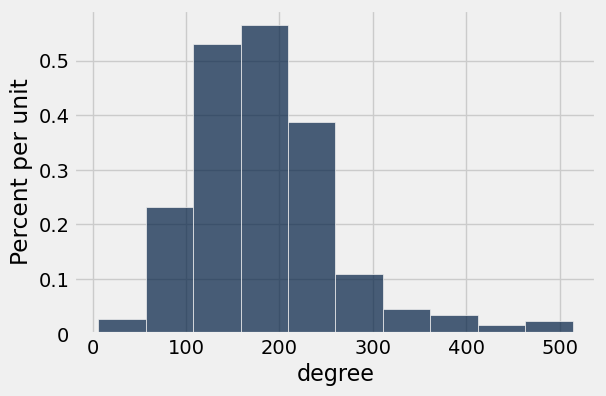

In [7]:
moc_data.hist('degree')

#### Betweeness Centrality 

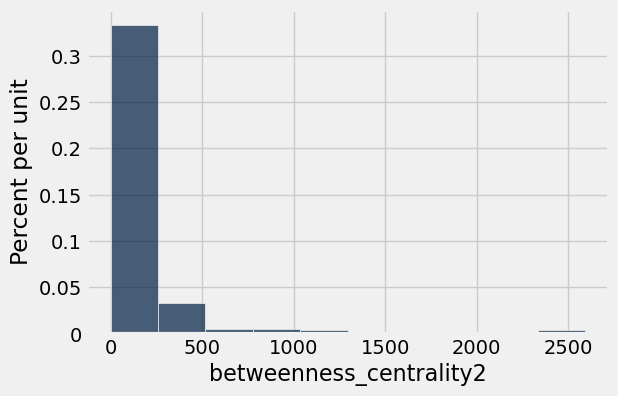

In [9]:
moc_node_centrality_dat2 = Table().with_columns(
    'node_id', moc_data1[0] ,
    'betweenness_centrality2', nx.betweenness_centrality(official_congress_twitter,normalized=False).values(),
    'eigenvector_centrality2', nx.eigenvector_centrality(official_congress_twitter).values(),
    'degree2', [y for (x,y) in list(official_congress_twitter.degree(official_congress_twitter.nodes()))])

moc_node_centrality_dat2

moc_data2 = moc_data1.join('node_id', moc_node_centrality_dat2)
moc_data2.hist('betweenness_centrality2')

#### Eigenvector Centrality Histogram

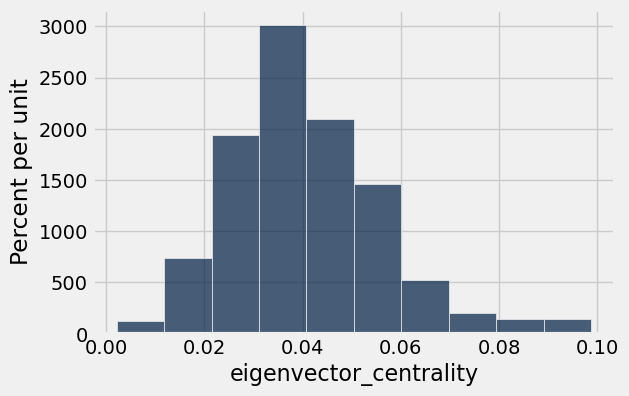

In [10]:
moc_data.hist('eigenvector_centrality')

#### Degree and Betweeness Centrality

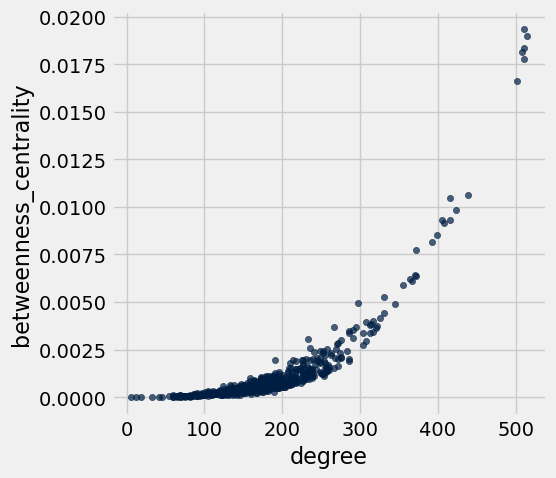

In [11]:
moc_data.scatter('degree', 'betweenness_centrality')

#### Degree and Eigenvector Centrality

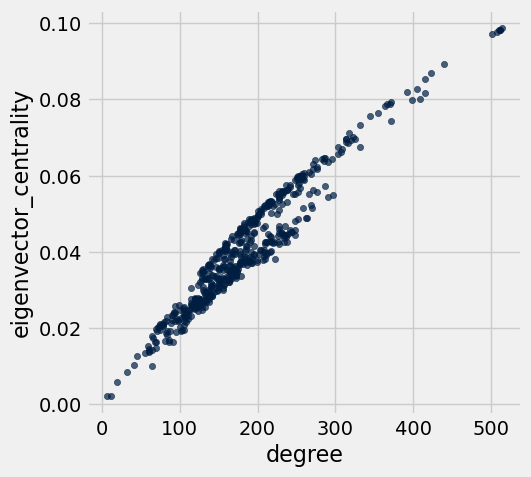

In [12]:
moc_data.scatter('degree', 'eigenvector_centrality')

## Part II:  Using epidemic models to understand centrality

The plots I made above show that the three different metrics of centrality (degree, betweeness centrality, and eigenvector centrality) do not all agree with each other. Now I will investigate which of these three quantities appears to be most effective for capturing how important a node is to the spread of ideas or diseases on the MOC Twitter network.

The approach that I take to answer this question is by using a simulation. I will explore how vaccinating nodes based on their degree, their betweenness centrality, and their eigenvector centrality affects the expected size of an "infected" nodes on the MOC Twitter network. The idea is that if, for example, nodes' degrees are a good metric for centrality in spreading the idea or diseases, then innoculating nodes with high degree should be effective at slowing the spread of the epidemic (in term of diseases).

In [13]:
def set_status(net, ids, value):
    """
    set the value of the 'status' attribute for the nodes with the given ids
    in the given network
    """
    nx.set_node_attributes(net,  
                           dict([x for x in zip(ids, [value]*len(ids))]),
                          'status')

def get_status(net, ids):
    """
    get the value of the 'status' attributes for the nodes 
    with given ids in the given network
    """
    dat = nx.get_node_attributes(net, 'status')
    return([dat[x] for x in ids])

def count_infected_nodes(net):
    return(np.sum(np.array(list(nx.get_node_attributes(net, 'status').values())) == 'infected'))

def sim_epidemic(net, start_nodes=None, innoculated_nodes=None, beta=0.3, draw=False):
    
    # all nodes start susceptible
    set_status(net, net.nodes(), 'susceptible')

    # innoculated nodes start as recovered
    if innoculated_nodes is not None:
        set_status(net, innoculated_nodes, 'innoculated')
    else:
        innoculated_nodes = []

    eligible_to_start = [x for x in net.nodes() if x not in innoculated_nodes]        
        
    # if no start_nodes specified, pick one node at random as the seed
    if start_nodes is None:
        infected_nodes = np.random.choice(eligible_to_start, 1)
    else:
        infected_nodes = start_nodes

    
    set_status(net, infected_nodes, 'infected')

    incidence = [len(infected_nodes)]
    
    if draw:
        status_cmap = {'susceptible' : '#00FF00', 'infected' : '#FF0000', 'recovered' : '#000000', 'innoculated' : '#0000FF'}
        pos = nx.random_layout(net)
        
        #fig_nums = []

    while count_infected_nodes(net) > 0:

        if draw:
            next_fig, next_ax = plt.subplots() 
            plt.figure(nx.draw(net, 
                               pos=pos,
                               cmap=status_cmap, 
                               node_color=[status_cmap[net.node[node]['status']] for node in net]));
        
        ## get neighbors of infected nodes
        neighbors = [net.neighbors(x) for x in infected_nodes]

        # see http://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
        neighbors = [item for sublist in neighbors for item in sublist]        
        neighbors_status = np.array(get_status(net, neighbors))

        ## set infected nodes to recovered
        set_status(net, infected_nodes, 'recovered')

        ## infect susceptible neighbors with probability beta x number of infected contacts
        ## (a node with more than one infected contact will have more than one draws at being infected here)
        neighbors = [x[0] for x in zip(neighbors, neighbors_status) if x[1] == 'susceptible']
        infect_draws = np.random.random_sample(len(neighbors))
        to_infect = list(np.array(neighbors)[np.where(infect_draws < beta)])

        num_infected_this_round = len(set(to_infect))
        
        set_status(net, to_infect, 'infected')
        infected_nodes = to_infect

        ## record number infected this round (also called incidence at this time step)
        incidence.append(num_infected_this_round)
    
    return incidence

In [14]:
def get_top_k(data, col, k):
    node_ids = data.sort(col, descending=True).take(np.arange(0,k)).column('node_id')
    return(node_ids)

def get_random_k(data, k):
    node_ids = data.sample(k, with_replacement=False).column('node_id')
    return(node_ids)

### Simulating the Spread of Ideas or Diseases on the MOC Twitter network

$\beta=$`beta_param` is a rate in which a node will get "infected" by a disease or idea

In [15]:
num_vaccines = 300
beta_param = .01
num_sims = 3000

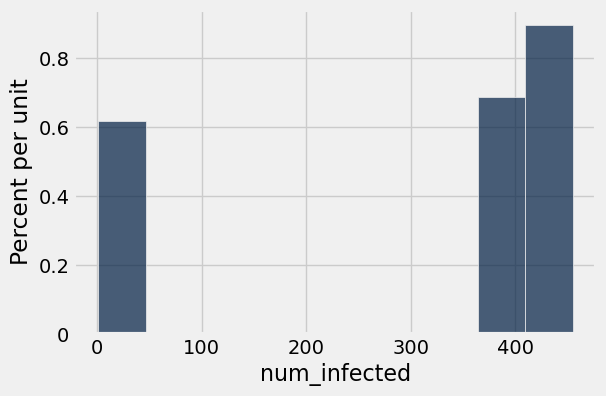

In [16]:
np.random.seed(99)
num_infected = make_array()

for _ in range(num_sims):
    num_infected = np.append(num_infected, np.sum(sim_epidemic(official_congress_twitter, beta=beta_param)))
    
moc_sir_res_table = Table().with_column('num_infected', num_infected)
moc_sir_res_table.hist()

Spread summary on the MOC Twitter network by calculating the mean number infected in the simulations we just ran.

In [17]:
moc_sir_mean_infected = np.mean(num_infected)

moc_sir_mean_infected

296.7436666666667

### Exploring Vaccination Strategies

From the simulation above, we have some understanding of how the spread of ideas of diseases would unfold on the MOC Twitter network. Now, we're going to try to compare different strategies for vaccinating nodes in the network.
The idea is to use this approach to try and understand what characteristics make for **central** nodes in this network. We'll consider a node to be central if vaccinating it reduces the expected size of the epidemic by a lot.

We're going to compare three different ways of measuring centrality: degree centrality, betweenness centrality, and eigenvector centrality. Our goal is to determine which of these three different centrality measures does the best job of telling us which nodes to vaccinate in order to prevent the spread of an epidemic on this MOC Twitter network.

In terms of a spread of ideas, this analysis helps us uncover the centrality metric that best predicts which Members of Congress are most important for the flow of information across the MOC Twitter network.

### Vaccination by degree

First, we'll investigate degree centrality--that is, we'll see how much the spread of a disease or idea is reduced when we target nodes with high degree for vaccination.

Identifying the 300 Members of Congress with the highest degree:

In [18]:
top_degree_id = get_top_k(moc_data, 'degree', num_vaccines)
top_degree_id

array([1055730738,   17513304,  266133081, 1080844782, 1206227149,
         18967498,  221793778,  213634439,  234053893, 3044993235,
         88806753, 2970462034, 1092979962,   15600527,  190328374,
       1080509366,   22509548, 1065995022,  950328072, 1051446626,
        239871673,   15356407,  381152398,   18915145,  233949261,
         19739126,   15160884, 2253968388,   18916432,  240760644,
        252819642,    6577802,   29766367,   17976923, 1444015610,
       3091316093, 2966758114,  217543151,  234014087,   24913074,
        246341769,  110545675,  234822928,  234812598,   28599820,
        240363117, 2953713339,  161743731,   13491312,  137407124,
        244268646,   22012091,   24195214, 1209417007,  234469322,
       2953494478,  292990703,  153486399,   17800215,  278145569,
         33655490,  237312687,  339852137,   15394954,   33977070,
        211530910,  234837632,  248850174,   24773493,  248699486,
       1060487274,  234022257,   17544524,   23976316,   13218

Vaccinating the nodes that have the highest degrees (which we just identified above).

In [19]:
np.random.seed(99)
num_infected_innocdegree = make_array()

for _ in range(num_sims): # use the number of simulation defined before
    num_infected_innocdegree = np.append(num_infected_innocdegree, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                             beta = beta_param,
                                                             innoculated_nodes = top_degree_id)))

num_infected_table=Table().with_column('num_infected', num_infected_innocdegree)
num_infected_table

num_infected
1
2
1
1
1
1
4
1
1
4


#### Vaccination by Degree Centrality Simulation Distribution

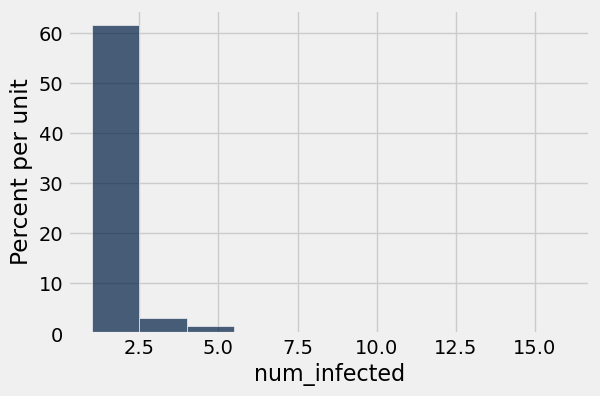

In [20]:
num_infected_table.hist()

Simulation mean of infected people

In [21]:
moc_target_degree_mean_infected = np.mean(num_infected_innocdegree)

moc_target_degree_mean_infected

1.3526666666666667

### Vaccination by eigenvector centrality

Next, we'll see how much the spread of a disease or idea is reduced when we target nodes with high eigenvector centrality for vaccination.

300 Members of Congress with the highest eigenvector centrality:

In [22]:
top_ec_id = get_top_k(moc_data, 'eigenvector_centrality', num_vaccines)
top_ec_id

array([1055730738, 1080844782,  266133081,   17513304, 1206227149,
         18967498,  221793778,  213634439,  234053893, 2970462034,
         15600527, 3044993235,   88806753, 1092979962,  190328374,
       1065995022,   22509548,  950328072, 1051446626,  239871673,
       1080509366,   15356407,   15160884,  233949261,  240760644,
         18915145,  252819642,   19739126,   18916432, 2253968388,
        381152398,   17976923,    6577802,   29766367, 1444015610,
        246341769,  234822928,  234812598, 2966758114,  161743731,
        110545675,  217543151,  244268646,  240363117,  137407124,
       2953713339,  234469322,   17800215, 1209417007,   15394954,
        211530910,   16256269,  278145569,  248699486,  234837632,
        234022257,   23976316,  248850174,   34340464,   33977070,
        237862972,  237312687,  224294785,   24773493,   20015903,
         33655490,   17544524,  124224165, 2929491549,  233693291,
         24913074,  237763317, 1060487274, 1089334250,   13491

I re-run our epidemic simulation, this time innoculating the nodes that have the highest eigenvector centralities (which we just identified above).

In [23]:
np.random.seed(99)
num_infected_innocec = make_array()

for _ in range(num_sims):
    num_infected_innocec = np.append(num_infected_innocec, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                             beta = beta_param,
                                                             innoculated_nodes = top_ec_id)))
    
num_infected_table2 = Table().with_column('num_infected', num_infected_innocec)
num_infected_table2

num_infected
1
1
1
1
1
1
1
1
1
2


#### Vaccination by Eigevector Centrality Simulation Distribution

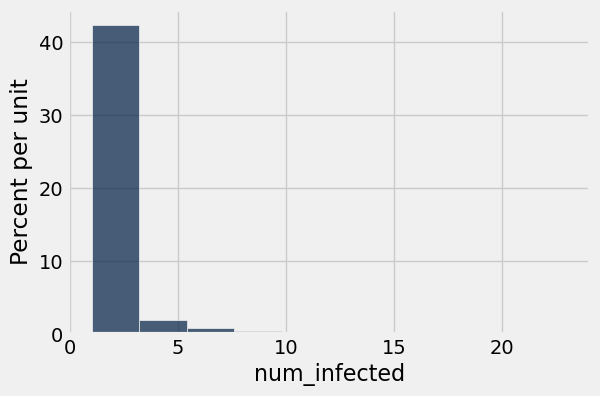

In [24]:
num_infected_table2.hist()

Simulation mean of infected people

In [25]:
moc_target_ec_mean_infected = np.mean(num_infected_innocec)
moc_target_ec_mean_infected

1.6266666666666667

### Vaccination by betweenness centrality

Lastly, we'll see how much the spread of a disease or idea is reduced when we target nodes with high betweenness centrality for vaccination.

Let's identify the 300 Members of Congress with the highest betweenness centrality:

In [26]:
top_bc_id = get_top_k(moc_data, 'betweenness_centrality', num_vaccines)
top_bc_id

array([  17513304, 1055730738,  266133081, 1206227149, 1080844782,
         18967498,  221793778, 3044993235,  213634439,  234053893,
       2970462034,   88806753, 1092979962,   15600527, 1080509366,
         22509548,  190328374,  950328072, 1065995022, 1051446626,
        381152398, 3091316093,  239871673,   15356407,   18915145,
         15160884,   29766367,   18916432,  240760644,  233949261,
       2966758114, 2953494478,   19739126,  234014087,   24913074,
       2253968388, 1444015610,  246341769,  252819642,  217543151,
       2863006655,   28599820,    6577802,   13491312,   22012091,
         17976923,   15808765,   24195214,  339852137,  237770636,
        234812598,   15764644, 1243902714,   13218102,  292990703,
        161743731, 1060487274,  153486399, 2953713339,  240363117,
       2962868158, 1209417007, 2932617195,  244268646,  234822928,
        942156122,  193872188, 1410590874,  210926192, 2962681881,
         19394188,   18909919,  110545675, 1140648348,   17544

Let's re-run our epidemic simulation, this time innoculating the nodes that have the highest betweenness centralities (which we just identified above).

In [27]:
np.random.seed(99)
num_infected_innocbc = make_array()

for _ in range(num_sims):
    num_infected_innocbc = np.append(num_infected_innocbc, 
                                        np.sum(sim_epidemic(official_congress_twitter, 
                                                            beta = beta_param,
                                                            innoculated_nodes = top_bc_id)))
    
num_infected_table3 = Table().with_column('num_infected', num_infected_innocbc)    
num_infected_table3

num_infected
1
2
1
1
1
1
1
1
1
1


#### Vaccination by Betweeness Centrality Simulation Distribution

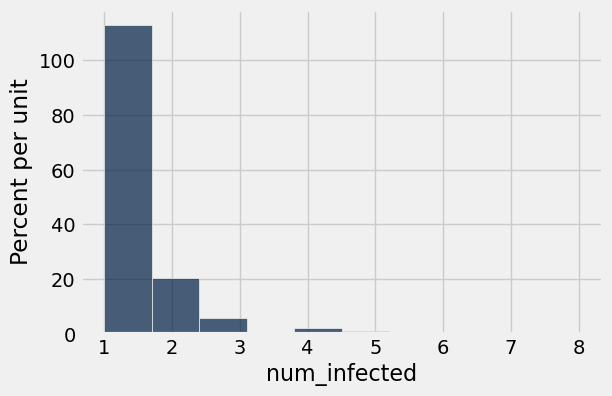

In [28]:
num_infected_table3.hist()

Simulation mean of infected people

In [29]:
moc_target_bc_mean_infected = np.mean(num_infected_innocbc)

moc_target_bc_mean_infected

1.3206666666666667

### Control: Vaccination at random

In order to do this, we'll take a random sample of nodes in the MOC Twitter network and innoculate them.

In [30]:
random_id = get_random_k(moc_data, num_vaccines)
random_id

array([  21269970,   18773159, 1155335864,  322013313, 1058051748,
        476256944,  510516465,  234053893,  248735463,  199325935,
        242873057,  150078976,  108376246,  229966028,  234822928,
       1080844782,   51228911,  245451804,   15751083, 1155212191,
        111635980, 1055685948, 1289319271,  216503958, 1083448909,
        584012853,  237299871,   56864092, 3018670151,  249288197,
       1058345042,   29766367, 1410590874,   43910797,   22545491,
       1880674038, 1080509366,  242836537,  281540744,  231510077,
         22523087,   22012091,   57065141,   13491312, 1623308912,
       1051127714,  241207373, 2953922782,  138770045,  296361085,
         18166778,   19726613, 1058917562,   15600527,  404132211,
        234057152,  278145569,  117501995,  132201224,  221162525,
         18915145,  211420609,   88784440,   22812754,  164007407,
         26424123, 2973870195,  600463589,  960696949,   26778110,
        231108733,  237814920,   63169388,   39249305,   23970

Now, let's re-run our epidemic simulation, this time innoculating the nodes that we just randomly picked.

In [31]:
np.random.seed(99)
num_infected_innocrandom = make_array()

for _ in range(num_sims):
    num_infected_innocrandom = np.append(num_infected_innocrandom, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                            beta = beta_param,
                                                            innoculated_nodes = random_id)))
    
num_infected_table4=Table().with_column('num_infected', num_infected_innocrandom)    
num_infected_table4

num_infected
1
1
19
11
1
1
36
39
7
25


#### Vaccination by Random Simulation Distribution

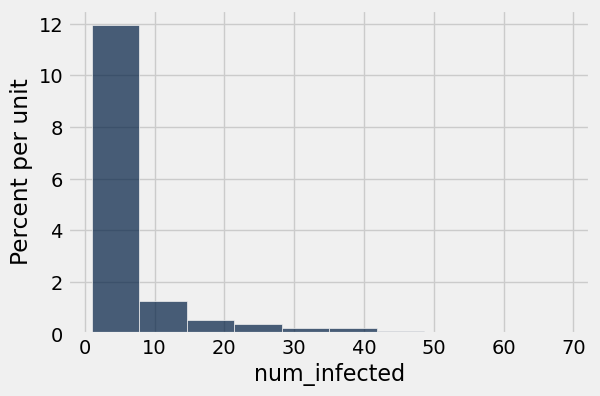

In [32]:
num_infected_table4.hist()

Simulation mean of infected people

In [33]:
moc_target_random_mean_infected = np.mean(num_infected_innocrandom)

moc_target_random_mean_infected

5.440666666666667

### Comparing the different strategies

Finally, let's compare the four vaccination strategies that we just simulated.

In [34]:
innoc_results = Table().with_columns('random', num_infected_innocrandom,
                                     'eigenvector', num_infected_innocec,
                                     'betweenness', num_infected_innocbc,
                                     'degree', num_infected_innocdegree)

innoc_results

random,eigenvector,betweenness,degree
1,1,1,1
1,1,2,2
19,1,1,1
11,1,1,1
1,1,1,1
1,1,1,1
36,1,1,4
39,1,1,1
7,1,1,1
25,2,1,4


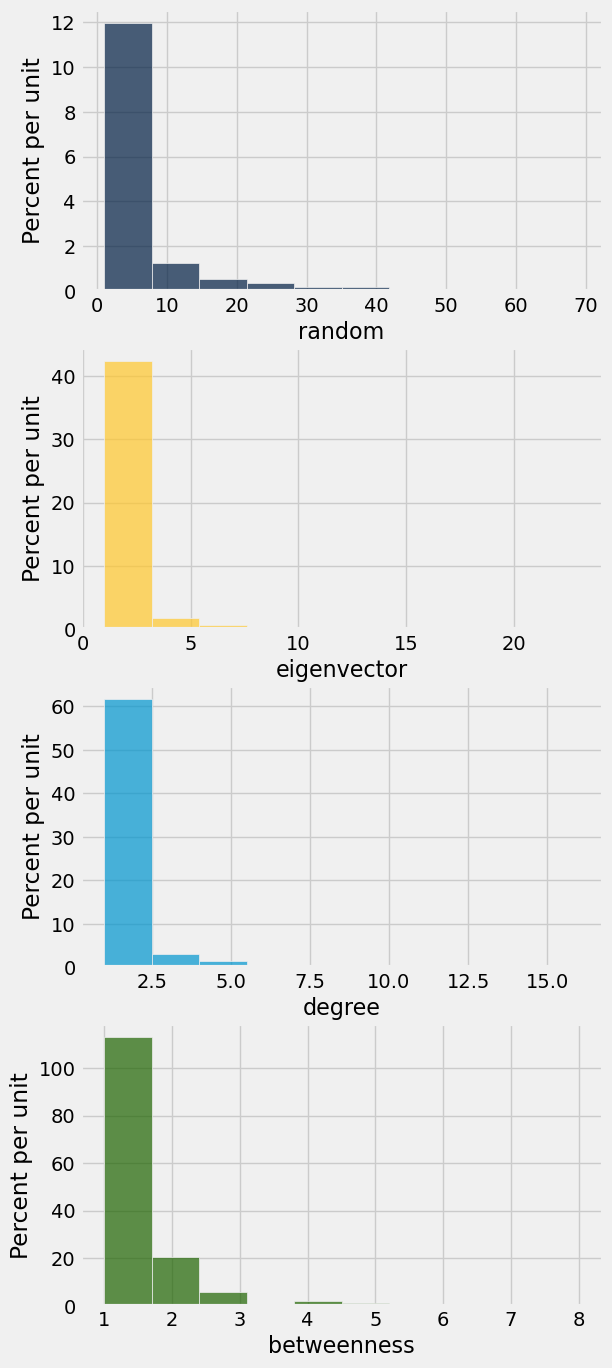

In [35]:
innoc_results.hist(['random', 'eigenvector', 'degree', 'betweenness'], overlay=False)

Average difference in # infected under eigenvector - random targeting strategy:  -3.814


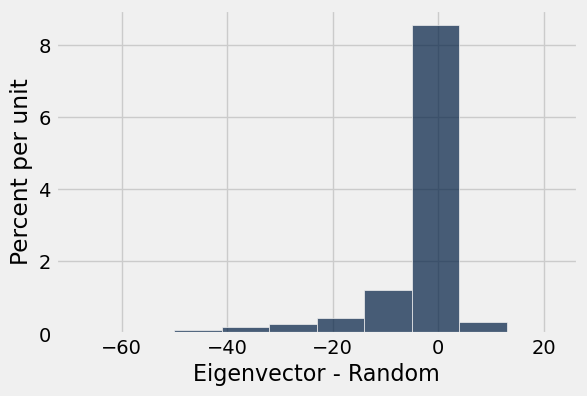

In [36]:
diff_ec_rand = innoc_results.column('eigenvector') - innoc_results.column('random')

Table().with_column('Eigenvector - Random', diff_ec_rand).hist()
print("Average difference in # infected under eigenvector - random targeting strategy: ", np.mean(diff_ec_rand))

Average difference in # infected under betweenness - random targeting strategy:  -4.12


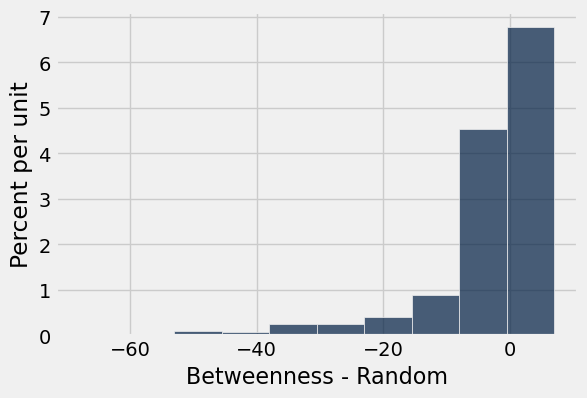

In [37]:
diff_bc_rand = innoc_results.column('betweenness') - innoc_results.column('random')

Table().with_column('Betweenness - Random', diff_bc_rand).hist()
print("Average difference in # infected under betweenness - random targeting strategy: ", np.mean(diff_bc_rand))

Based on these results, the innoculation strategy that appears to be most effective is **betweenness centrality** since it has the biggest difference (much lower average of infected) compared to random. 


### Examing the strategies with different budgets

Now we're going to conduct one final analysis to understand this problem. Above, we assumed that we always had a fixed number of vaccines. Next, we'll repeat the analysis we did above many different times, each time changing the number of vaccines that we have to distribute. This will help us understand whether or not our conclusions depend on the budget.

The loop below repeats the analysis above many times across different parameter values.

In [38]:
np.random.seed(99)
reps_per_param = 10

num_vaccines = np.repeat(np.array([50, 100, 150, 200, 250, 300, 350, 400]),
                         reps_per_param)

num_infected_random = make_array()
num_infected_degree = make_array()
num_infected_bc = make_array()
num_infected_ec = make_array()

for cur_num_vaccines in np.repeat(num_vaccines, reps_per_param):

        random_ids = get_random_k(moc_data, cur_num_vaccines)
        top_ec_ids = get_top_k(moc_data,'eigenvector_centrality', cur_num_vaccines)
        top_bc_ids = get_top_k(moc_data, 'betweenness_centrality', cur_num_vaccines)
        top_degree_ids = get_top_k(moc_data, 'degree', cur_num_vaccines)

        num_infected_random = np.append(num_infected_random, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes= random_ids)))
        
        num_infected_ec = np.append(num_infected_ec, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes=top_ec_ids)))
        num_infected_bc = np.append(num_infected_bc, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes=top_bc_ids)))
        num_infected_degree = np.append(num_infected_degree, 
                                        np.sum(sim_epidemic(official_congress_twitter, 
                                                            beta=beta_param,
                                                            innoculated_nodes=top_degree_ids)))

sim_results = Table().with_columns('num_vaccines', np.repeat(num_vaccines, reps_per_param),
                                  'num_infected_random', num_infected_random,
                                  'num_infected_degree', num_infected_degree,
                                  'num_infected_bc', num_infected_bc,
                                  'num_infected_ec', num_infected_ec)
sim_results

num_vaccines,num_infected_random,num_infected_degree,num_infected_bc,num_infected_ec
50,1,239,288,261
50,282,264,235,2
50,324,2,5,262
50,347,1,263,239
50,354,3,2,300
50,360,258,1,4
50,290,189,2,5
50,1,225,1,249
50,371,270,1,265
50,1,1,258,252


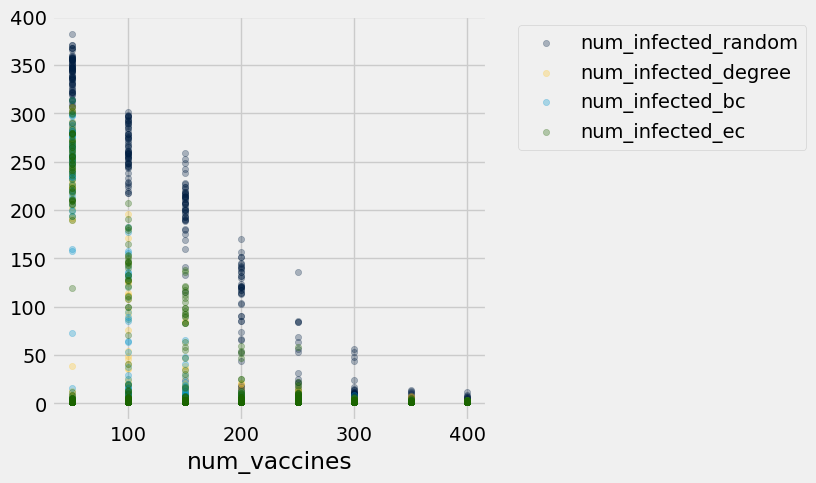

In [39]:
sim_results.scatter('num_vaccines', overlay=True, alpha=.3)

It's a little hard to tell what's going on because there's a lot of information being plotted. So we'll aggregate the results of the simulation by calculating the average outbreak size for each vaccination strategy and vaccine budget. Then we'll plot these averages.

The average number infected for each value of `num_vaccines` and for each innoculation strategy.

In [40]:
sim_results_aggregate = sim_results.group('num_vaccines', np.mean)

sim_results_aggregate

num_vaccines,num_infected_random mean,num_infected_degree mean,num_infected_bc mean,num_infected_ec mean
50,251.74,109.06,142.09,132.86
100,166.98,25.71,26.26,39.6
150,100.98,5.46,5.24,24.3
200,46.49,2.82,1.9,4.91
250,9.5,2.03,1.76,3.46
300,5.42,1.37,1.42,1.46
350,2.35,1.3,1.13,1.33
400,1.77,1.09,1.09,1.2


In [41]:
print('avg infected when innoculation based on:')
print('... degree: ', sim_results_aggregate.column('num_infected_degree mean').mean())
print('... betweenness centrality: ', sim_results_aggregate.column('num_infected_bc mean').mean())
print('... eigenvector centrality: ', sim_results_aggregate.column('num_infected_ec mean').mean())
print('... random:', sim_results_aggregate.column('num_infected_random mean').mean())

avg infected when innoculation based on:
... degree:  18.605
... betweenness centrality:  22.611250000000002
... eigenvector centrality:  26.14
... random: 73.15375


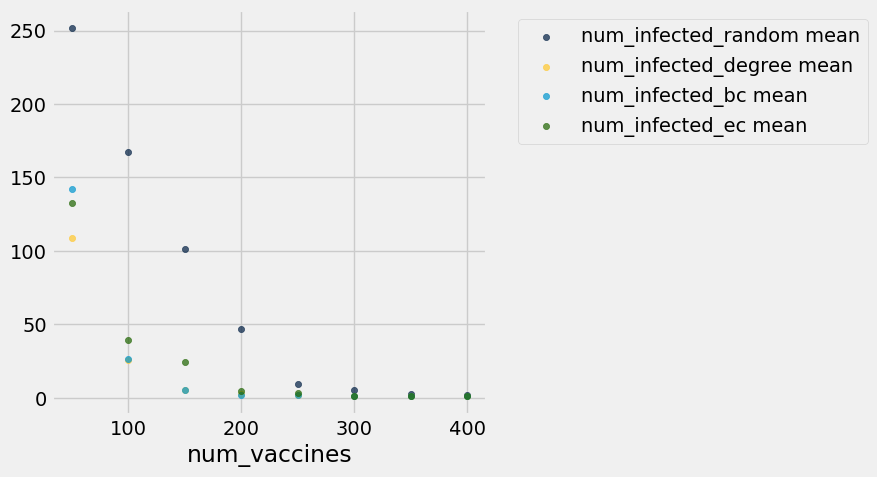

In [42]:
sim_results_aggregate.scatter('num_vaccines', overlay=True)

Based on these results, the innoculation strategy that appears to be most effective across the range of vaccine budgets we investigated is by using **degree**. Note this conclusion changed from betweenness centrality to degree since we are not considering the number of vaccines before.

## Conclusion

By using Member of Congress (MOC) network data, we found that **betweenness centrality** has the biggest role in spreading and also decreasing the spread of disease or ideas. In terms of MOC, we can think of these findings as those congressmen who are in the middle (shortest path) of any pair of congressmen, has the biggest influence in spreading information. This conclusion is taken based on our findings that the number of infected people is the lowest compared to the control group if we vaccinate those who are in betweenness centrality. Additionally, we also get a finding that vaccination using **degree** is the most effective if we take budget into consideration. One of the reasons might be because vaccination by degree is more effective on the lower number of vaccines that affect the total number of infected people across the vaccines number. This discrepancy opens a new room of exploration and is surely an interesting topic for a future project.